In [186]:
# 基本moduleのimport
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 基本moduleの設定module
plt.rcParams['font.family'] = "MS Gothic"
plt.style.use("ggplot")
sns.set_theme(context="talk", style="darkgrid", font="MS GOTHIC")

In [187]:
# 出力行数の変更
pd.set_option("display.max_rows", 100)

In [188]:
# データの読み込み
train_df = pd.read_csv("datasets/train.csv")
test_df = pd.read_csv("datasets/test.csv")
oil_df = pd.read_csv("datasets/oil.csv")
holidays_df = pd.read_csv("datasets/holidays_events.csv")
stores_df = pd.read_csv("datasets/stores.csv")
transactions_df = pd.read_csv("datasets/transactions.csv")
submission_df = pd.read_csv("datasets/sample_submission.csv")

## oil_dfのEDA

In [189]:
oil_df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [190]:
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1218 non-null   object 
 1   dcoilwtico  1175 non-null   float64
dtypes: float64(1), object(1)
memory usage: 19.2+ KB


In [191]:
# dateをdatetime型に変更
oil_df["date"] = pd.to_datetime(oil_df["date"])
oil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [192]:
oil_df = oil_df.set_index("date")

In [193]:
oil_df

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


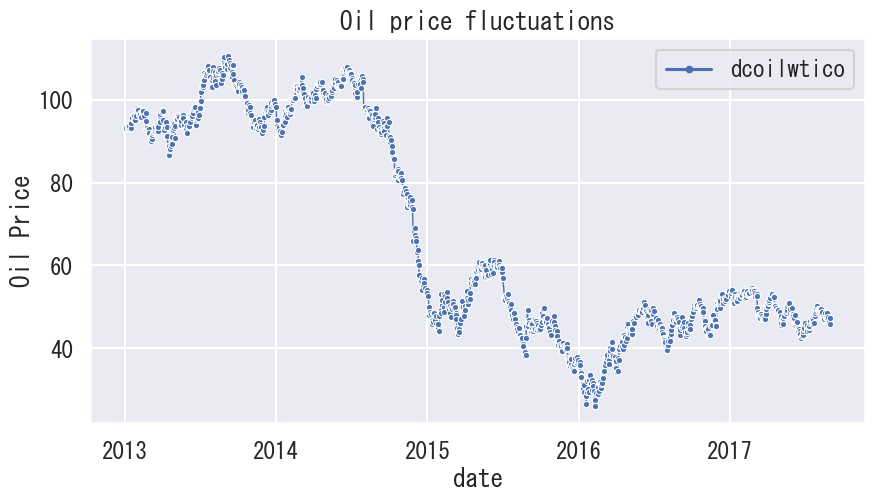

In [194]:
# 可視化して傾向を確認
plt.figure(figsize=(10, 5))
sns.lineplot(oil_df, lw=1, markers=".")
plt.ylabel("Oil Price")
plt.title("Oil price fluctuations")
plt.show()

In [195]:
# oil priceと価格の関係をEDA
train_df_cp = train_df.copy()
train_df_cp["date"] = pd.to_datetime(train_df["date"])
train_df_cp.set_index("date")
train_df_cp = pd.merge(train_df_cp, oil_df, on="date", how="left")
train_df_cp

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,NaN
1,1,2013-01-01,1,BABY CARE,0.000,0,NaN
2,2,2013-01-01,1,BEAUTY,0.000,0,NaN
3,3,2013-01-01,1,BEVERAGES,0.000,0,NaN
4,4,2013-01-01,1,BOOKS,0.000,0,NaN
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57


In [196]:
train_df_cp["dcoilwtico"].isnull().sum()

928422

In [197]:
# null値を直前の値で埋め、直前の値がない場合は直後の値で埋める
train_df_cp["dcoilwtico"] = train_df_cp["dcoilwtico"].fillna(method="ffill").fillna(method="bfill").astype(float)
train_df_cp["dcoilwtico"].isnull().sum()

0

In [198]:
avg_sales = pd.DataFrame(train_df_cp.groupby(["date", "dcoilwtico"])["sales"].mean()).reset_index()
avg_sales

,date,dcoilwtico,sales
0,2013-01-01,93.14,1.409438
1,2013-01-02,93.14,278.390807
2,2013-01-03,92.97,202.840197
3,2013-01-04,93.12,198.911154
4,2013-01-05,93.12,267.873244
...,...,...,...
1679,2017-08-11,48.81,463.733851
1680,2017-08-12,48.81,444.798280
1681,2017-08-13,48.81,485.768618
1682,2017-08-14,47.59,427.004717


In [199]:
# dcoilwticoとsalesの相関関係を確認
print(avg_sales.corr())

                date  dcoilwtico     sales
date        1.000000   -0.838830  0.718394
dcoilwtico -0.838830    1.000000 -0.626889
sales       0.718394   -0.626889  1.000000


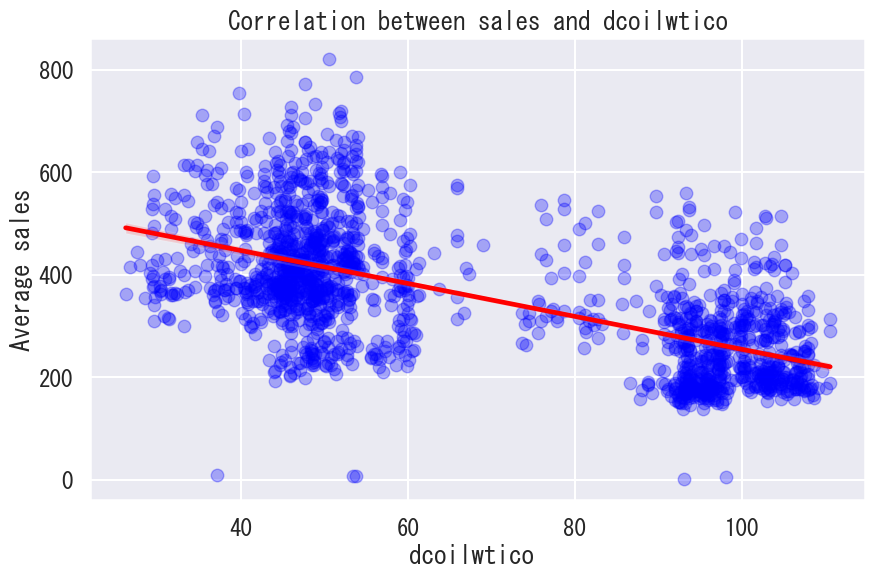

In [200]:
# 相関のplotを確認
plt.figure(figsize=(10, 6))
sns.regplot(data=avg_sales, x='dcoilwtico', y='sales', scatter_kws={"color":"blue", "alpha":0.3}, line_kws={"color":"red"})
plt.xlabel("dcoilwtico ")
plt.ylabel("Average sales")
plt.title("Correlation between sales and dcoilwtico")
plt.show()

In [201]:
# lag特徴量の作成
# 1か月周期
for i in range(30):
    avg_sales[f"dcoilwtico_lag{i+1}"] = avg_sales["dcoilwtico"].shift(i+1)

In [202]:
avg_sales

,date,dcoilwtico,sales,dcoilwtico_lag1,dcoilwtico_lag2,dcoilwtico_lag3,dcoilwtico_lag4,dcoilwtico_lag5,dcoilwtico_lag6,dcoilwtico_lag7,...,dcoilwtico_lag21,dcoilwtico_lag22,dcoilwtico_lag23,dcoilwtico_lag24,dcoilwtico_lag25,dcoilwtico_lag26,dcoilwtico_lag27,dcoilwtico_lag28,dcoilwtico_lag29,dcoilwtico_lag30
0,2013-01-01,93.14,1.409438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,93.14,278.390807,93.14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-03,92.97,202.840197,93.14,93.14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-04,93.12,198.911154,92.97,93.14,93.14,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-05,93.12,267.873244,93.12,92.97,93.14,93.14,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,2017-08-11,48.81,463.733851,48.54,49.59,49.07,49.37,49.57,49.57,49.57,...,45.78,46.73,47.10,46.40,46.02,46.53,46.53,46.53,46.06,45.48
1680,2017-08-12,48.81,444.798280,48.81,48.54,49.59,49.07,49.37,49.57,49.57,...,45.78,45.78,46.73,47.10,46.40,46.02,46.53,46.53,46.53,46.06
1681,2017-08-13,48.81,485.768618,48.81,48.81,48.54,49.59,49.07,49.37,49.57,...,45.78,45.78,45.78,46.73,47.10,46.40,46.02,46.53,46.53,46.53
1682,2017-08-14,47.59,427.004717,48.81,48.81,48.81,48.54,49.59,49.07,49.37,...,46.21,45.78,45.78,45.78,46.73,47.10,46.40,46.02,46.53,46.53


In [203]:
# salesとdcoilwticoとの相関を確認
avg_sales_corr = avg_sales.corr()
avg_sales_corr["sales"].sort_values(ascending=False).head(12)

sales               1.000000
date                0.718394
dcoilwtico_lag29   -0.602205
dcoilwtico_lag30   -0.602329
dcoilwtico_lag28   -0.602759
dcoilwtico_lag27   -0.604477
dcoilwtico_lag26   -0.606557
dcoilwtico_lag24   -0.607247
dcoilwtico_lag25   -0.607429
dcoilwtico_lag23   -0.607739
dcoilwtico_lag22   -0.608377
dcoilwtico_lag21   -0.608712
Name: sales, dtype: float64

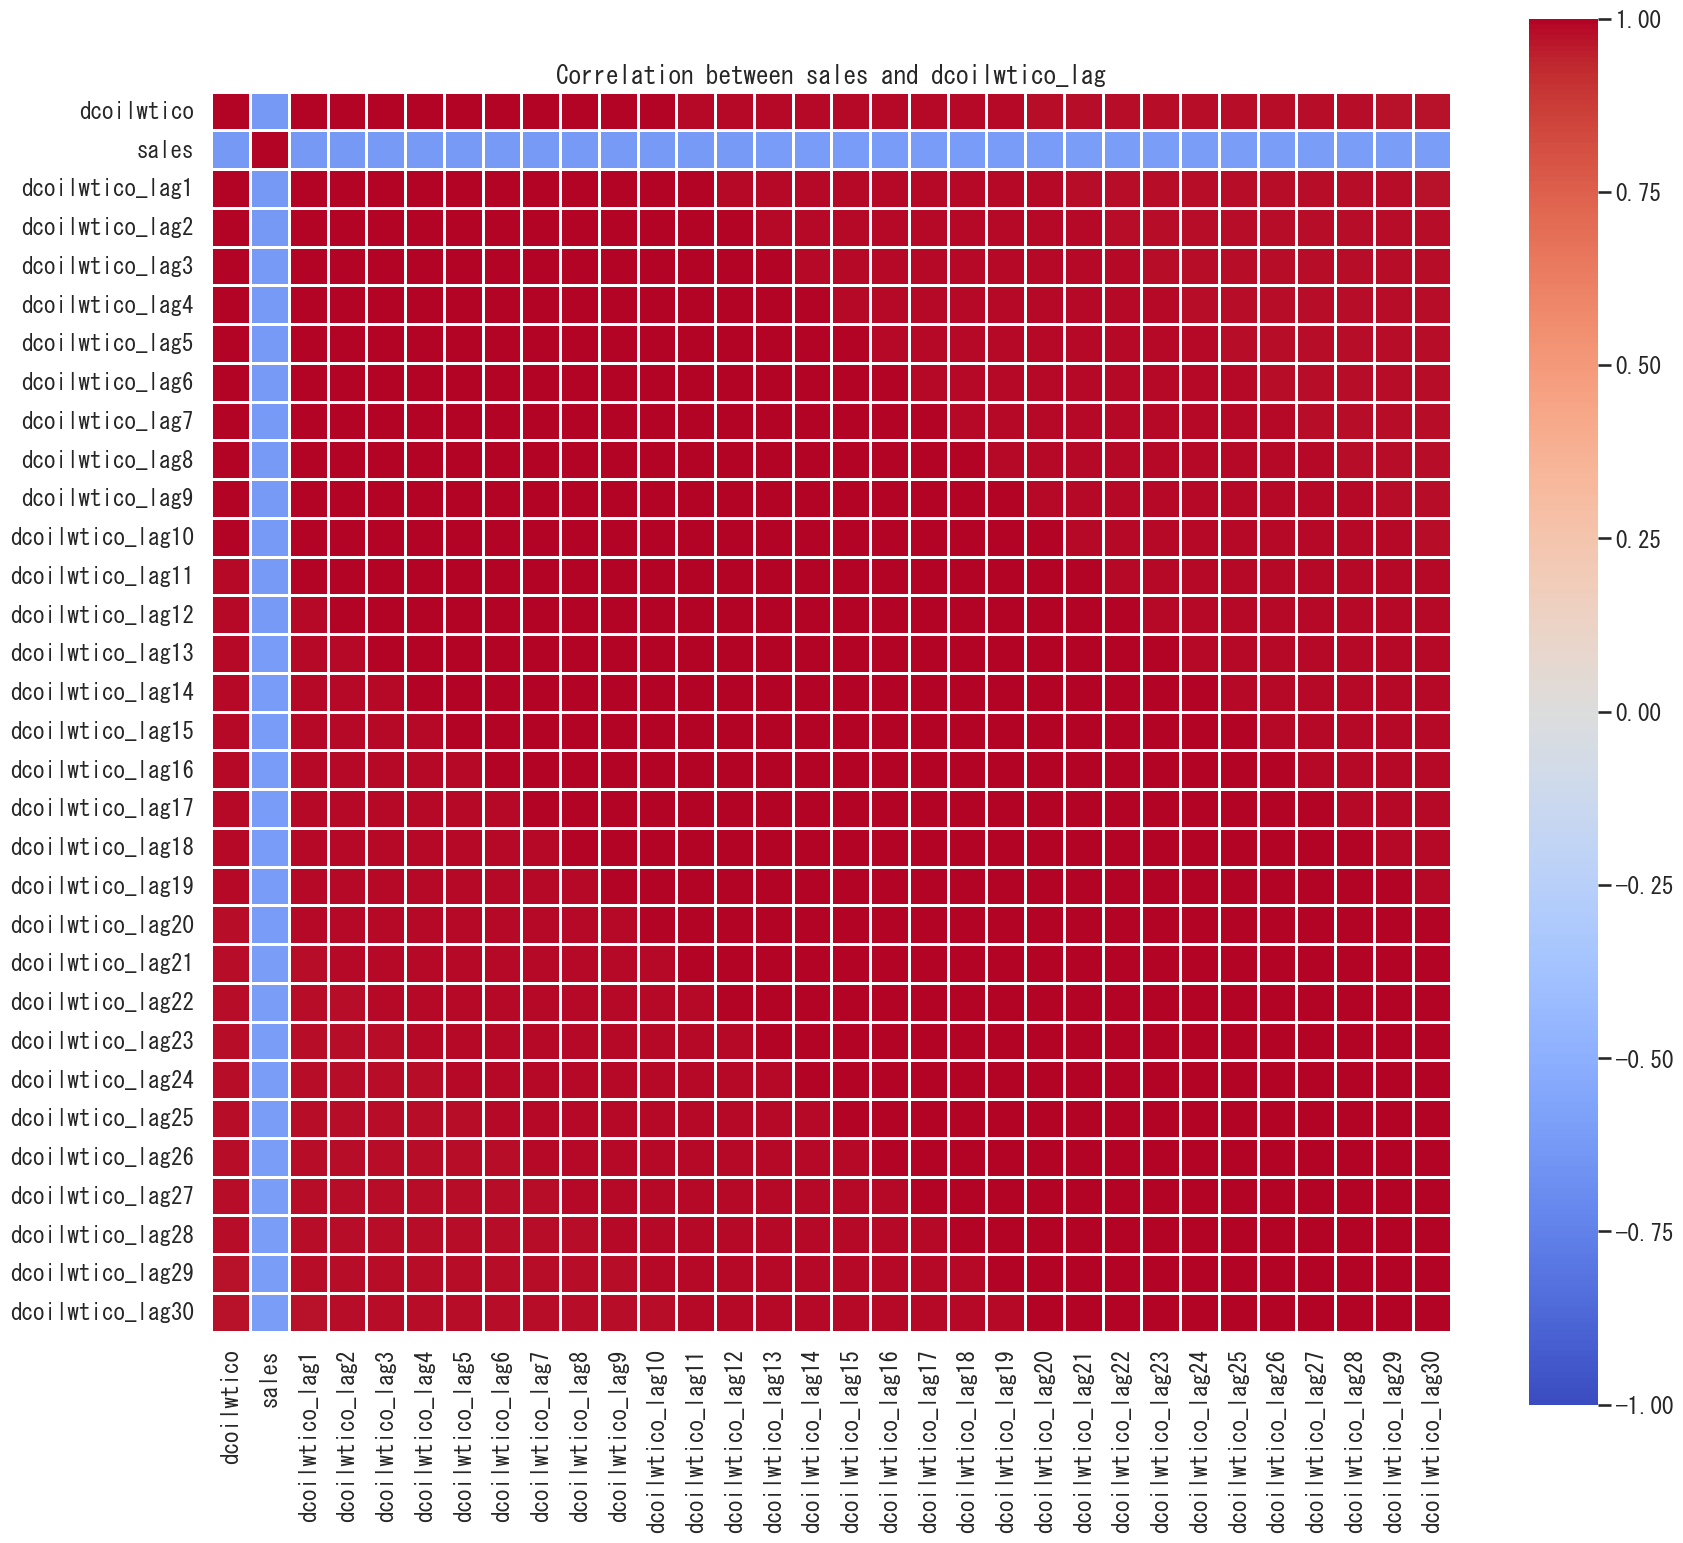

In [204]:
# 相関の周期を確認
plt.figure(figsize=(20, 18))
sns.heatmap(avg_sales.corr(numeric_only=True), annot=False, cmap="coolwarm", square=True, linewidths=1, vmin=-1)
plt.title("Correlation between sales and dcoilwtico_lag")
plt.show()

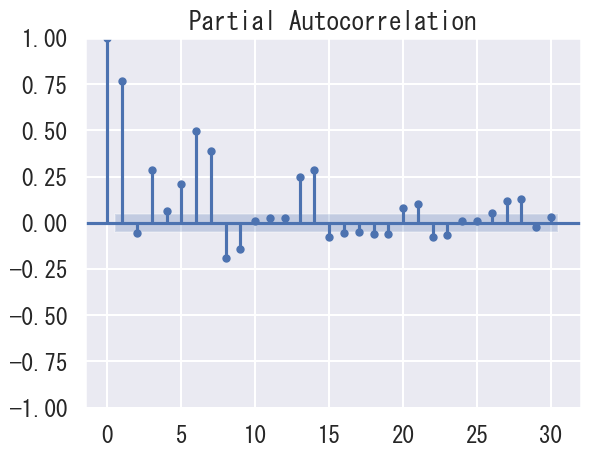

In [205]:
# 偏自己相関
import statsmodels.api as sm
fig_oil = sm.graphics.tsa.plot_pacf(avg_sales["sales"], lags=30)

## oil_dfのEDAから分かったこと
* oil priceは2014年の終わりに石油ショックがあり、下がっている。
* oil priceとsalesには負の相関がある  
* oil priceのラグ特徴量はsalesに対してかない強い相関があるが、それ以上にラグ特徴量同士で強い相関があって、特徴量としては使えない
### 以上のことから、2014年以前のデータはあまりあてにならない。oil priceとsalesには負の相関がある。dcoilwticoのラグ特徴量は使わない。


## stores_dfのEDA

In [206]:
stores_df

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [207]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   store_nbr  54 non-null     int64 
 1   city       54 non-null     object
 2   state      54 non-null     object
 3   type       54 non-null     object
 4   cluster    54 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.2+ KB


In [208]:
train_df_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           int64         
 1   date         datetime64[ns]
 2   store_nbr    int64         
 3   family       object        
 4   sales        float64       
 5   onpromotion  int64         
 6   dcoilwtico   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 160.3+ MB


In [209]:
# train_dfからstoreごとのsalesの平均を求める
sales_by_store =pd.DataFrame(train_df_cp.groupby("store_nbr")["sales"].mean()).reset_index()
sales_by_store

,store_nbr,sales
0,1,254.534889
1,2,387.918172
2,3,908.405495
3,4,340.273886
4,5,280.580231
5,6,453.172101
6,7,484.993334
7,8,548.734739
8,9,475.229271
9,10,172.999096


In [210]:
# stores_dfとsales_by_storeを結合する
sales_by_store = pd.merge(stores_df, sales_by_store, on="store_nbr", how="left")
sales_by_store

,store_nbr,city,state,type,cluster,sales
0,1,Quito,Pichincha,D,13,254.534889
1,2,Quito,Pichincha,D,13,387.918172
2,3,Quito,Pichincha,D,8,908.405495
3,4,Quito,Pichincha,D,9,340.273886
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,280.580231
5,6,Quito,Pichincha,D,13,453.172101
6,7,Quito,Pichincha,D,8,484.993334
7,8,Quito,Pichincha,D,8,548.734739
8,9,Quito,Pichincha,B,6,475.229271
9,10,Quito,Pichincha,C,15,172.999096


In [211]:
# cityごとのsalesの平均
sales_at_city = pd.DataFrame(sales_by_store.groupby("city")["sales"].mean().sort_values(ascending=False)).reset_index()
sales_at_city

,city,sales
0,Quito,556.577090
1,Cayambe,509.709179
2,Ambato,362.632273
3,Daule,345.282181
4,Loja,339.379530
5,Babahoyo,319.349181
6,Machala,300.392253
7,Esmeraldas,294.963151
8,Cuenca,294.924279
9,Guayaquil,276.594464


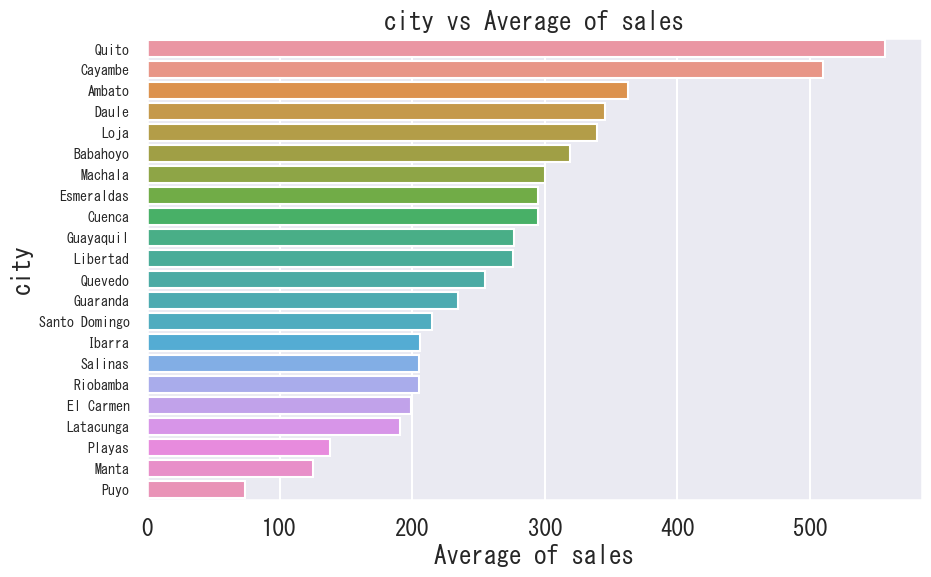

In [212]:
# 可視化
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_at_city, y="city", x="sales", orient="h")
plt.yticks(fontsize=10)
plt.xlabel("Average of sales")
plt.title("city vs Average of sales")
plt.show()

In [213]:
# stateごとのsalesの平均
sales_at_state = pd.DataFrame(sales_by_store.groupby("state")["sales"].mean().sort_values(ascending=False)).reset_index()
sales_at_state

,state,sales
0,Pichincha,554.110358
1,Tungurahua,362.632273
2,Loja,339.379530
3,El Oro,300.392253
4,Esmeraldas,294.963151
5,Azuay,294.924279
6,Los Rios,287.243342
7,Guayas,270.172671
8,Bolivar,234.821670
9,Santo Domingo de los Tsachilas,214.942315


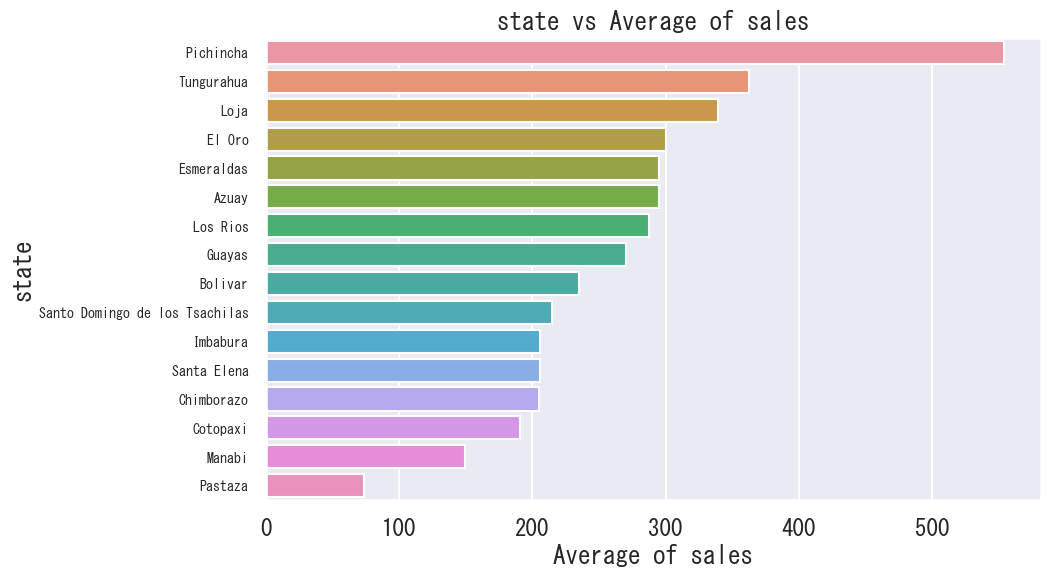

In [214]:
# 可視化
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_at_state, y="state", x="sales", orient="h")
plt.yticks(fontsize=10)
plt.xlabel("Average of sales")
plt.title("state vs Average of sales")
plt.show()

In [215]:
# cityとstateの違いは都市と州なので、その違いを確認
df_temp = pd.DataFrame(sales_by_store.groupby(["state", "city"])["sales"].mean().sort_values(ascending=False)).reset_index()
df_temp

,state,city,sales
0,Pichincha,Quito,556.577090
1,Pichincha,Cayambe,509.709179
2,Tungurahua,Ambato,362.632273
3,Guayas,Daule,345.282181
4,Loja,Loja,339.379530
5,Los Rios,Babahoyo,319.349181
6,El Oro,Machala,300.392253
7,Esmeraldas,Esmeraldas,294.963151
8,Azuay,Cuenca,294.924279
9,Guayas,Guayaquil,276.594464


In [216]:
# typeについて
store_type = pd.DataFrame(sales_by_store.groupby("type")["sales"].mean().sort_values(ascending=False)).reset_index()
store_type

,type,sales
0,A,705.878743
1,D,350.979407
2,B,326.739714
3,E,269.121301
4,C,197.263301


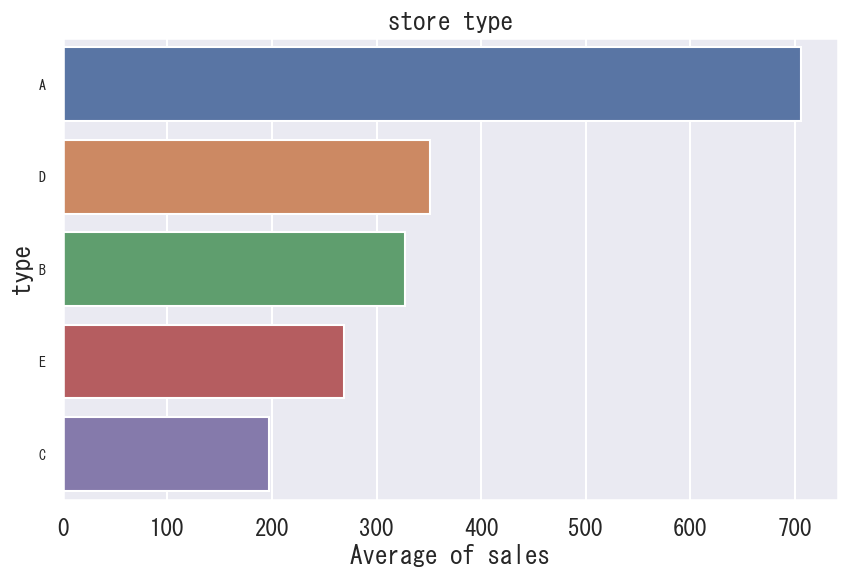

In [217]:
# 可視化
plt.figure(figsize=(10, 6))
sns.barplot(data=store_type, y="type", x="sales", orient="h")
plt.yticks(fontsize=10)
plt.xlabel("Average of sales")
plt.title("store type")
plt.show()

In [218]:
# clusterについて
store_cluster = pd.DataFrame(sales_by_store.groupby("cluster")["sales"].mean().sort_values(ascending=False)).reset_index()
store_cluster

,cluster,sales
0,5,1117.245254
1,14,708.227718
2,8,647.377856
3,11,603.507018
4,17,592.231511
5,6,342.661732
6,1,326.163967
7,12,324.461406
8,13,324.364108
9,4,296.572872


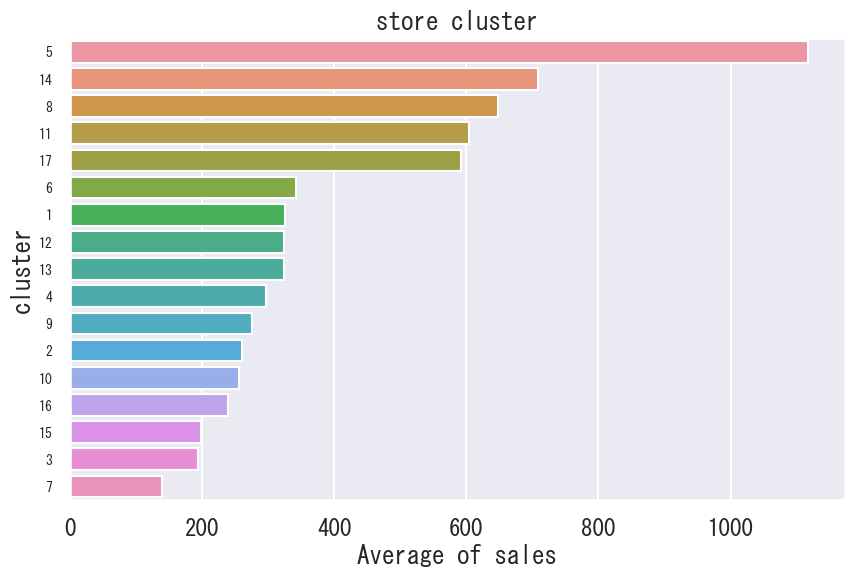

In [219]:
# 可視化
plt.figure(figsize=(10, 6))
sns.barplot(data=store_cluster, y="cluster", x="sales", orient="h", order=store_cluster["cluster"])
plt.yticks(fontsize=10)
plt.xlabel("Average of sales")
plt.title("store cluster")
plt.show()

## stores_dfのEDAから分かったこと
* 'city', 'state', 'type', 'cluster'はcategoricalな特徴量だが、それぞれのunique値がsalesに対する貢献度が違いそう  
* dummy変数にするときにそれぞれ数値的な意味合いを持たせたほうがよさそうだ

## transactions_dfのEDA

In [221]:
transactions_df

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [222]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [223]:
# dateをdatetime型に変更
transactions_df["date"] = pd.to_datetime(transactions_df["date"])

In [224]:
total_sales = pd.DataFrame(train_df_cp.groupby(["date", "store_nbr"])["sales"].sum()).reset_index()
total_sales

,date,store_nbr,sales
0,2013-01-01,1,0.000000
1,2013-01-01,2,0.000000
2,2013-01-01,3,0.000000
3,2013-01-01,4,0.000000
4,2013-01-01,5,0.000000
...,...,...,...
90931,2017-08-15,50,16879.121004
90932,2017-08-15,51,20154.559000
90933,2017-08-15,52,18600.046000
90934,2017-08-15,53,8208.189000


In [225]:
total_sales = pd.merge(transactions_df, total_sales, how="left")
total_sales

,date,store_nbr,transactions,sales
0,2013-01-01,25,770,2511.618999
1,2013-01-02,1,2111,7417.148000
2,2013-01-02,2,2358,10266.718981
3,2013-01-02,3,3487,24060.348000
4,2013-01-02,4,1922,10200.083980
...,...,...,...,...
83483,2017-08-15,50,2804,16879.121004
83484,2017-08-15,51,1573,20154.559000
83485,2017-08-15,52,2255,18600.046000
83486,2017-08-15,53,932,8208.189000


In [226]:
# transactionとsalesの相関関係を確認
print(total_sales.corr())

                  date  store_nbr  transactions     sales
date          1.000000   0.017779     -0.029857  0.278103
store_nbr     0.017779   1.000000      0.189311  0.216148
transactions -0.029857   0.189311      1.000000  0.837384
sales         0.278103   0.216148      0.837384  1.000000


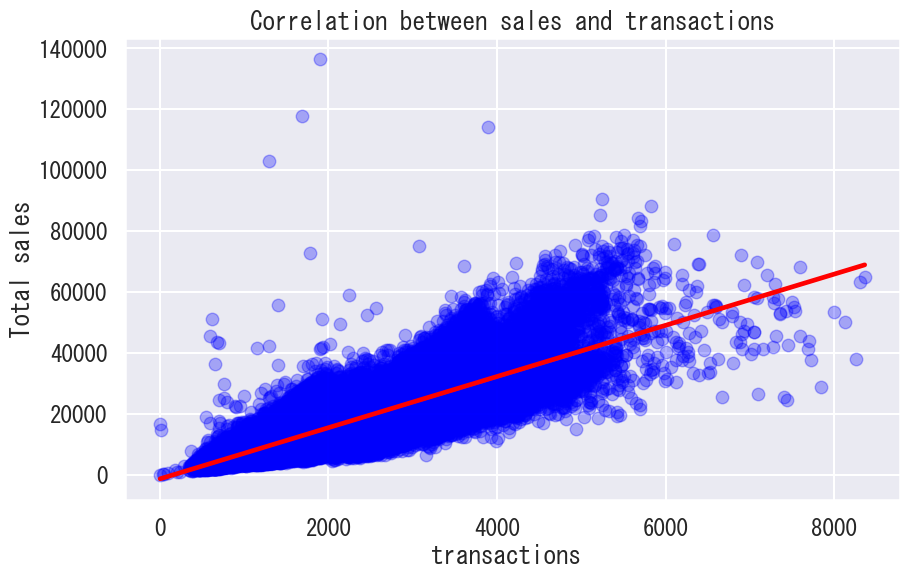

In [227]:
# 相関関係を可視化
plt.figure(figsize=(10, 6))
sns.regplot(data=total_sales, x='transactions', y='sales', scatter_kws={"color":"blue", "alpha":0.3}, line_kws={"color":"red"})
plt.xlabel("transactions ")
plt.ylabel("Total sales")
plt.title("Correlation between sales and transactions")
plt.show()

In [228]:
# lag特徴量の作成
# 1か月周期
for i in range(40):
    total_sales[f"transactions_lag{i+1}"] = total_sales["transactions"].shift(i+1)

In [233]:
# salesとdcoilwticoとの相関を確認
total_sales_corr = total_sales.corr()
total_sales_corr["sales"].sort_values(ascending=False).head(40)

sales                 1.000000
transactions          0.837384
transactions_lag1     0.508405
transactions_lag2     0.360631
transactions_lag3     0.309732
date                  0.278103
store_nbr             0.216148
transactions_lag4     0.182170
transactions_lag5     0.173774
transactions_lag6     0.107567
transactions_lag10    0.081657
transactions_lag12    0.077177
transactions_lag11    0.069974
transactions_lag36    0.044004
transactions_lag37    0.040759
transactions_lag9     0.035329
transactions_lag7     0.020435
transactions_lag38    0.018753
transactions_lag40    0.006398
transactions_lag13   -0.000738
transactions_lag39   -0.013088
transactions_lag8    -0.019461
transactions_lag15   -0.026540
transactions_lag35   -0.037063
transactions_lag16   -0.039846
transactions_lag33   -0.050991
transactions_lag14   -0.053288
transactions_lag34   -0.072947
transactions_lag32   -0.075641
transactions_lag17   -0.086571
transactions_lag31   -0.104831
transactions_lag30   -0.128560
transact

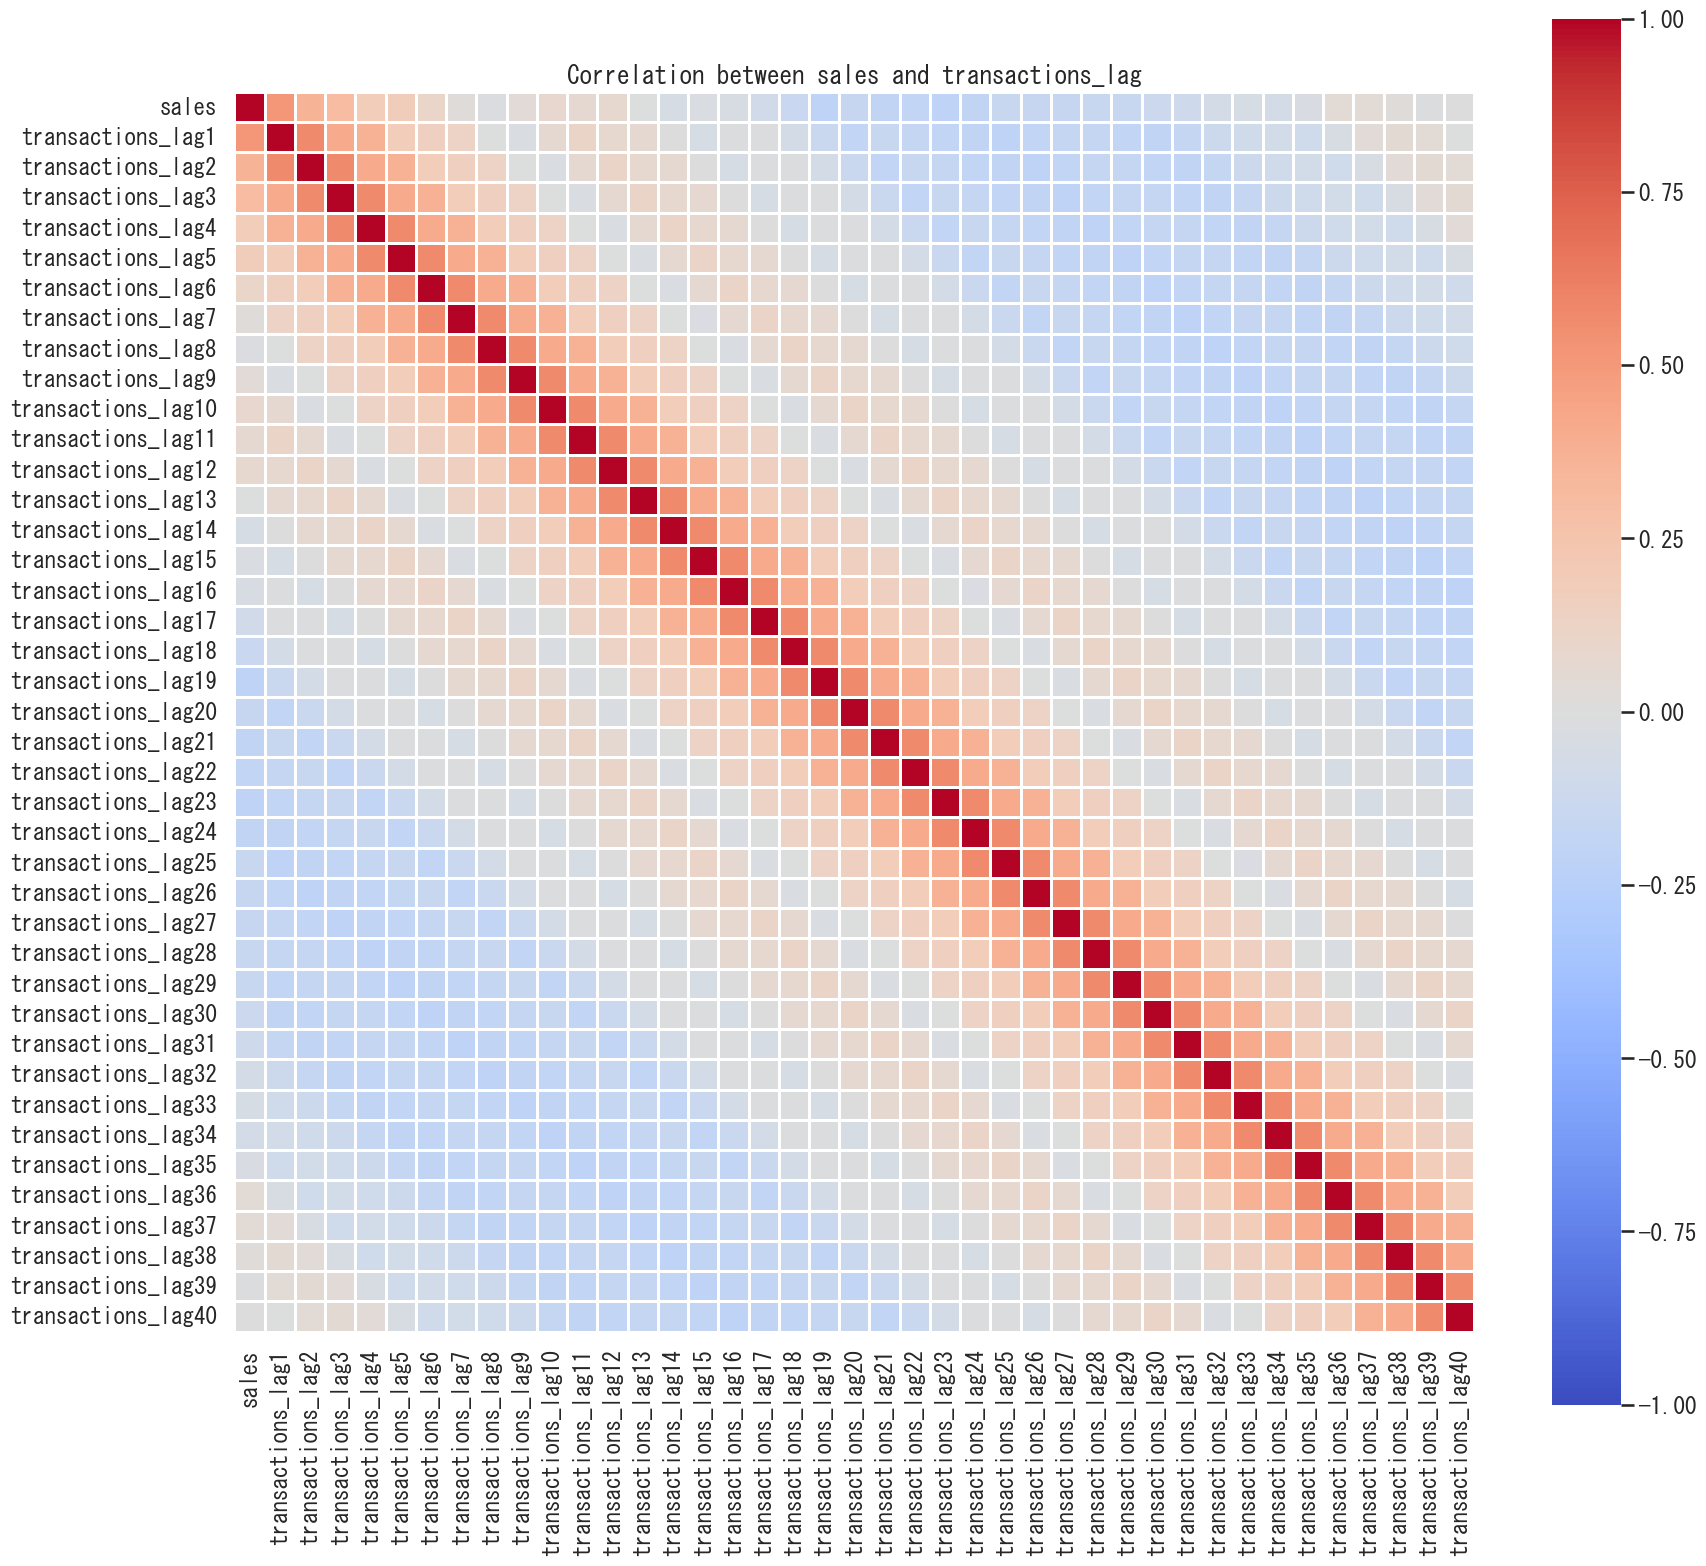

In [232]:
# heatmapで説明変数同士の相関と相関の周期を確認
plt.figure(figsize=(20, 18))
sns.heatmap(total_sales.iloc[:, 3:].corr(numeric_only=True), annot=False, cmap="coolwarm", square=True, linewidths=1, vmin=-1)
plt.title("Correlation between sales and transactions_lag")
plt.show()

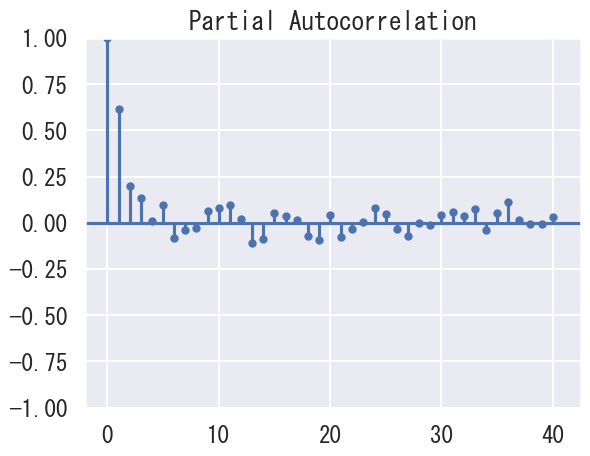

In [234]:
# 偏自己相関の確認
fig_transactions = sm.graphics.tsa.plot_pacf(total_sales["sales"], lags=40)

## transactions_dfのEDAから分かったこと
* transactionsとsalesには強い相関がある  
* salesとtransactions_lag1, transactions_lag2, transactions_lag3もそれぞれ高い相関がありlag特徴量として使える